In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [147]:
df=pd.read_csv("./data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [148]:
df.shape

(10000, 3)

In [149]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

### **Finding Outliers**

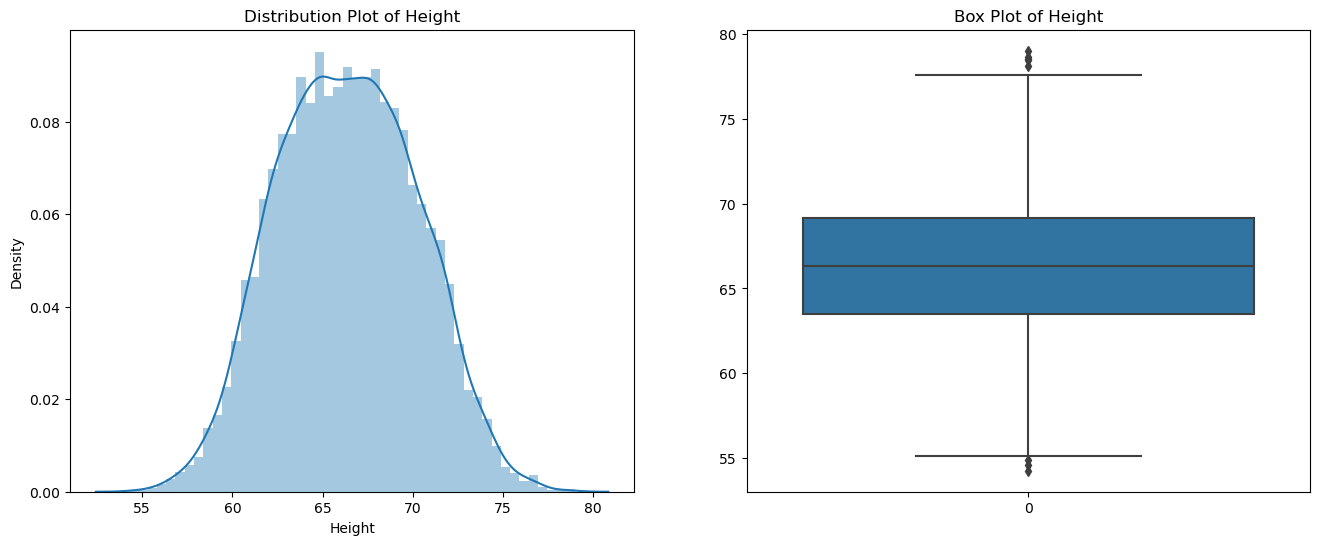

In [150]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df['Height'])
plt.title("Distribution Plot of Height")

plt.subplot(122)
sns.boxplot(df['Height'])
plt.title("Box Plot of Height")

plt.show()

In [151]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)
print("Upper Limit =",upper_limit)
print("Lower Limit =",lower_limit)


Upper Limit = 74.7857900583366
Lower Limit = 58.13441158671655


In [152]:
df[(df['Height'] < lower_limit) | (df['Height'] > upper_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## **Methods to Treat Outliers**

### **1. Trimming**

In [153]:
new_df = df[(df['Height'] >= lower_limit) & (df['Height'] <= upper_limit)]
new_df.shape

(9800, 3)

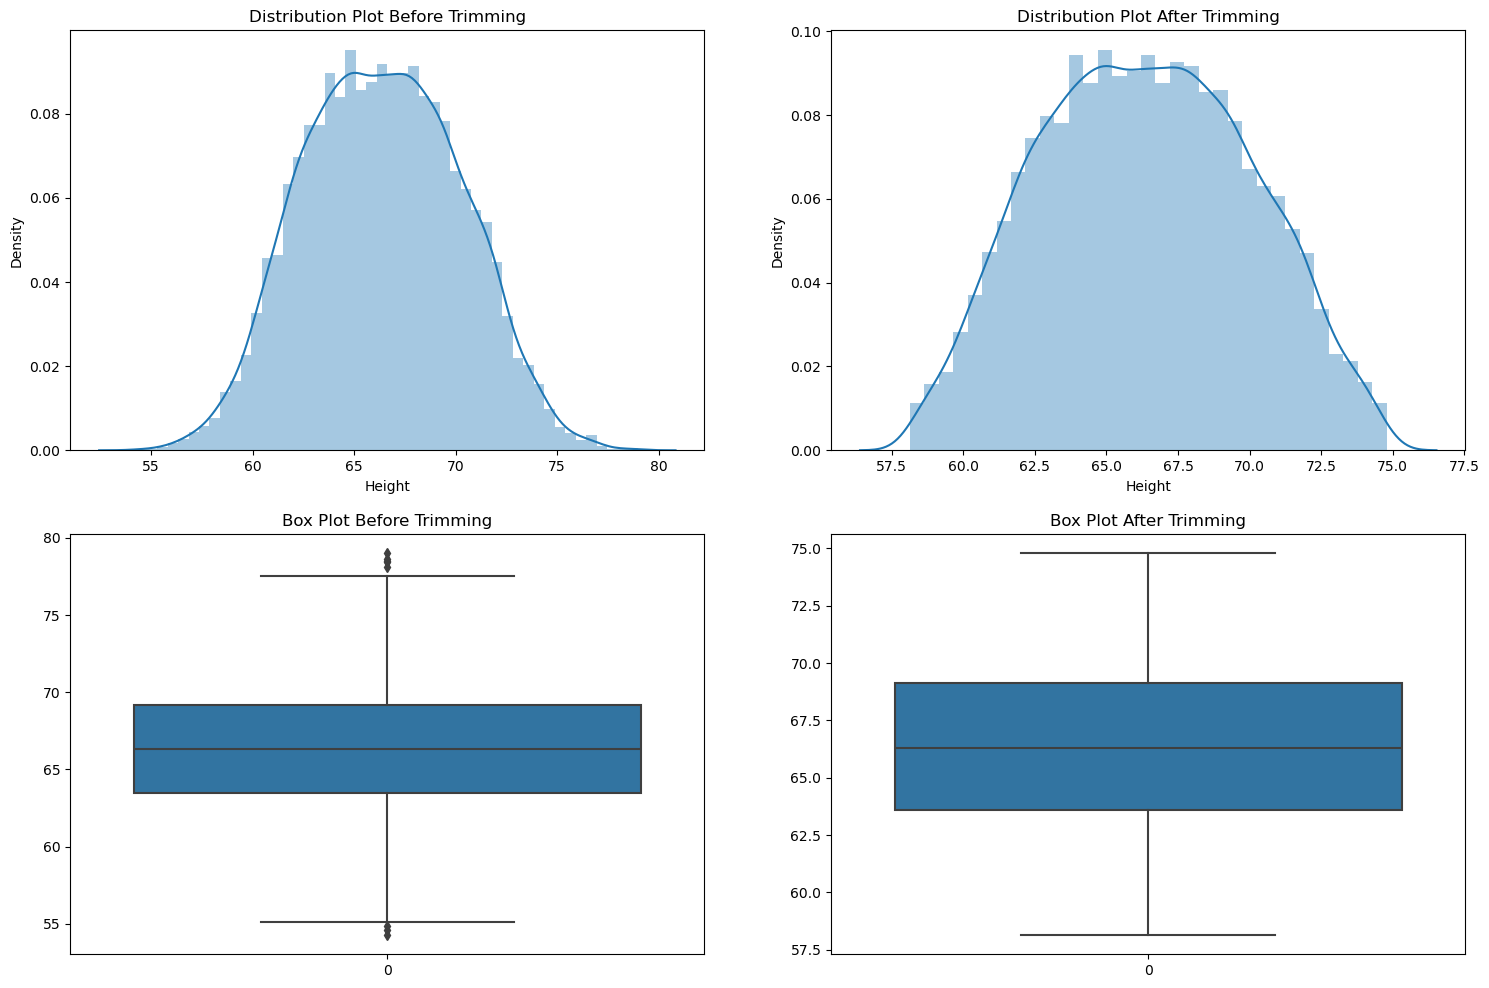

In [154]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(df['Height'])
plt.title("Distribution Plot Before Trimming")

plt.subplot(2,2,2)
sns.distplot(new_df['Height'])
plt.title("Distribution Plot After Trimming")

plt.subplot(2,2,3)
sns.boxplot(df['Height'])
plt.title("Box Plot Before Trimming")

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'])
plt.title("Box Plot After Trimming")

plt.show()

### **2.Capping**

In [155]:
new_df_cap = df.copy()

# Cap the Height values
new_df_cap['Height'] = np.where(
    new_df_cap['Height'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Height'] < lower_limit,
        lower_limit,
        new_df_cap['Height']
    )
)

In [156]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

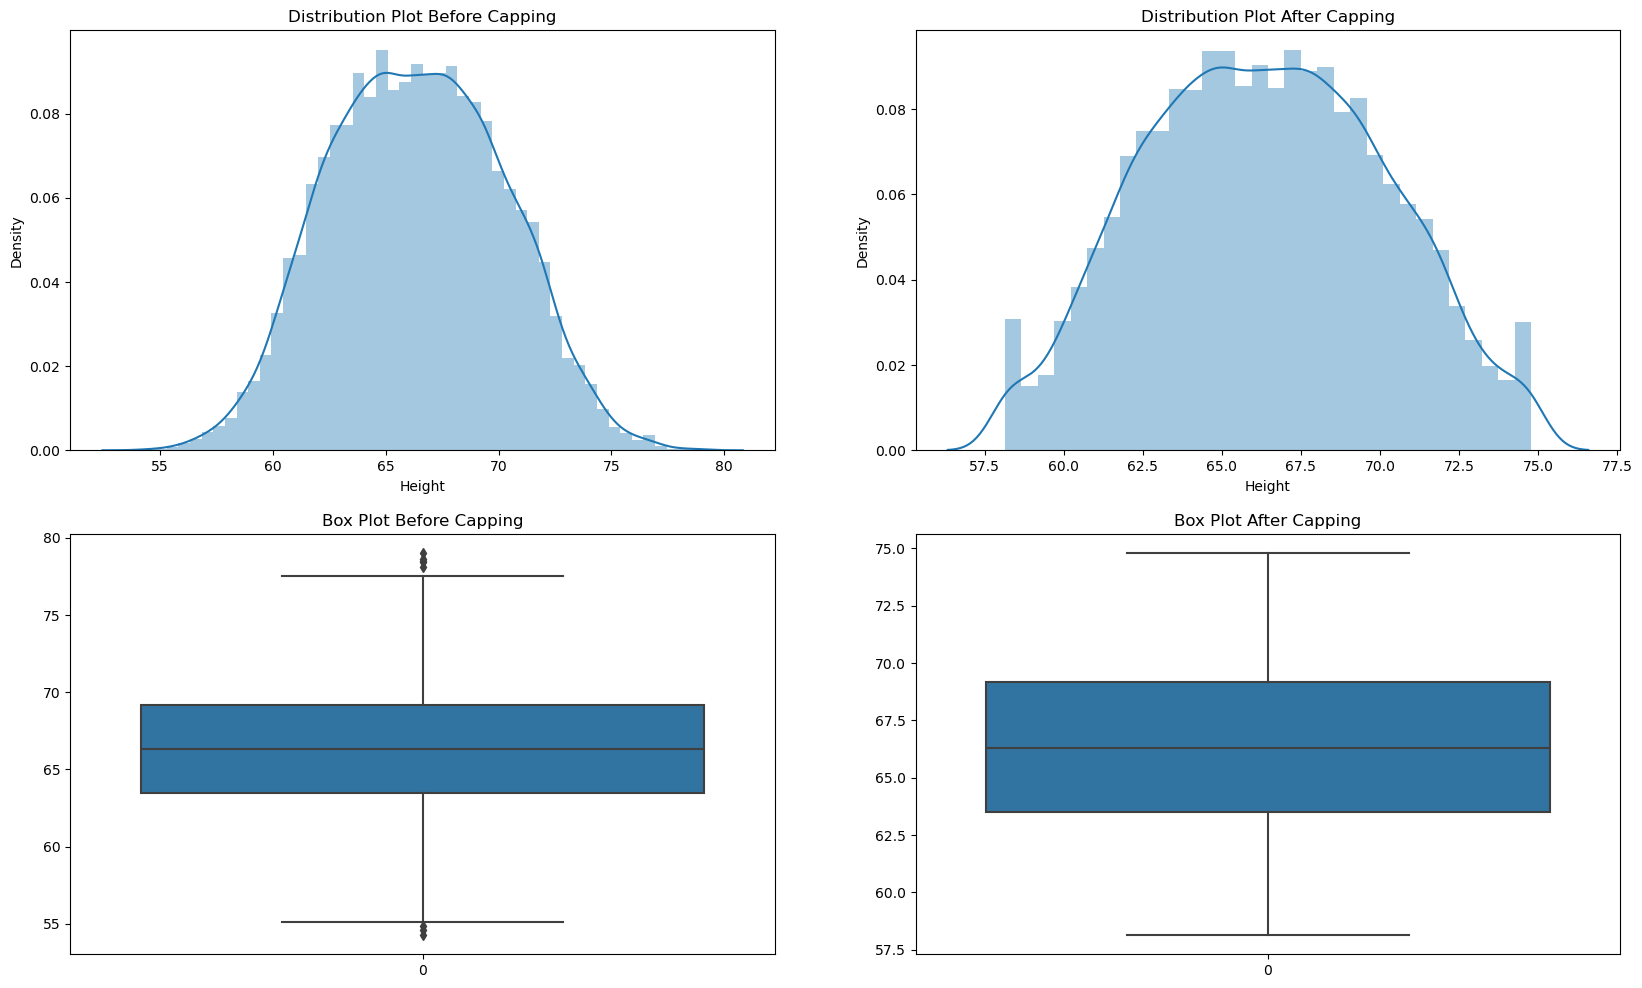

In [161]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.distplot(df['Height'])
plt.title("Distribution Plot Before Capping")

plt.subplot(2,2,2)
sns.distplot(new_df_cap['Height'])
plt.title("Distribution Plot After Capping")

plt.subplot(2,2,3)
sns.boxplot(df['Height'])
plt.title("Box Plot Before Capping")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Height'])
plt.title("Box Plot After Capping")

plt.show()